In [4]:
import numpy as np
import pandas as pd

from dataset.data_simulation import get_simple_uplift_data
from ibotta_uplift.ibotta_uplift import IbottaUplift
from ggplot import *


/Users/samweiss/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/samweiss/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/samweiss/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/samweiss/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is depre

In [5]:
y, x, t = get_simple_uplift_data(10000)

y = pd.DataFrame(y)
y.columns = ['revenue','cost', 'noise']
y['profit'] = y['revenue'] - y['cost']

In [6]:
uplift_model = IbottaUplift()
param_grid = dict(num_nodes=[8], dropout=[.1, .5], activation=[
                          'relu'], num_layers=[1, 2], epochs=[25], batch_size=[30])


uplift_model.fit(x, y, t.reshape(-1,1), param_grid = param_grid, n_jobs = 1)

/Users/samweiss/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
erupt_curves, dists = uplift_model.get_erupt_curves()

/Users/samweiss/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


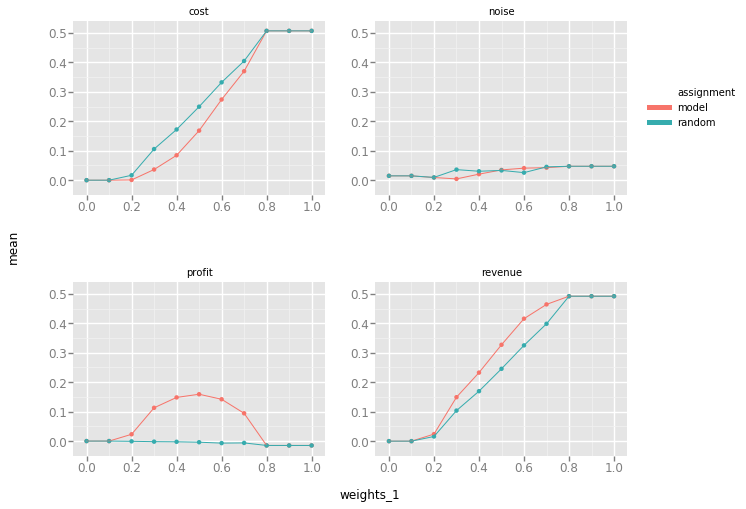

<ggplot: (315292841)>

In [8]:
dists['weights_1'] = [np.float(x.split(',')[0]) for x in dists['weights']]
erupt_curves['weights_1'] = [np.float(x.split(',')[0]) for x in erupt_curves['weights']]
ggplot(aes(x='weights_1', y='mean', group = 'assignment', colour = 'assignment'), data=erupt_curves) +\
    geom_line()+\
    geom_point()+facet_wrap("response_var_names")

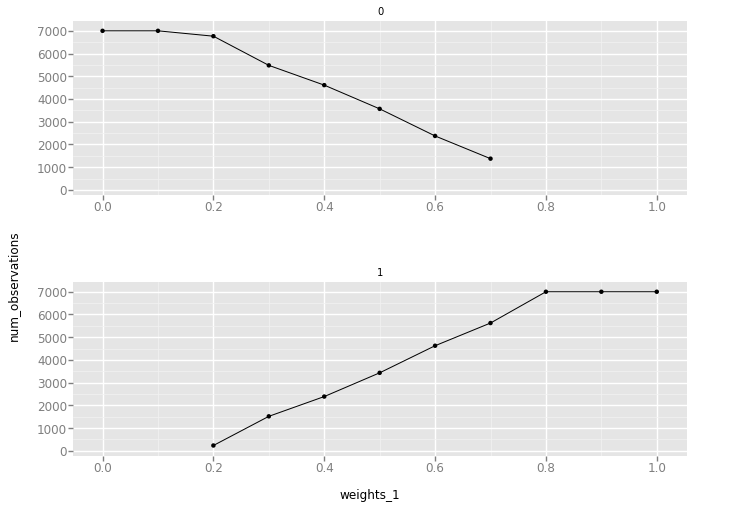

<ggplot: (-9223372036548615438)>

In [9]:
ggplot(aes(x='weights_1', y='num_observations'), data=dists) +\
    geom_line()+\
    geom_point()+facet_wrap('tmt')

In [10]:
uplift_model.calibrate()


/Users/samweiss/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


/Users/samweiss/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


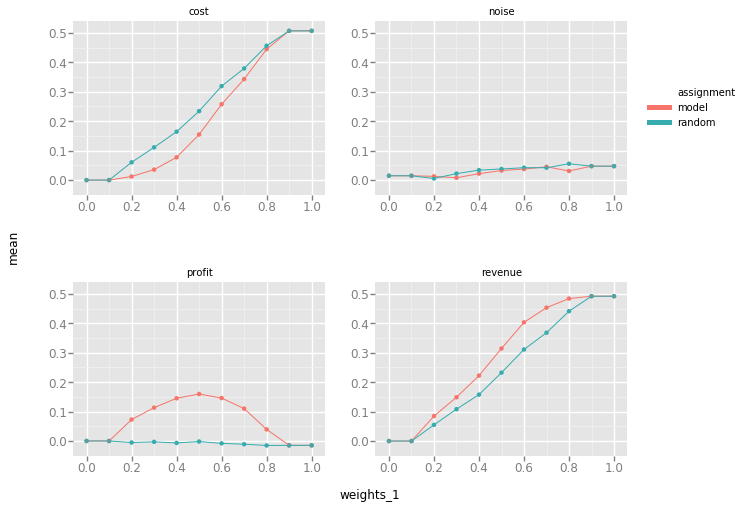

<ggplot: (310877704)>

In [11]:
erupt_curves, dists = uplift_model.get_erupt_curves(calibrator = True)
dists['weights_1'] = [np.float(x.split(',')[0]) for x in dists['weights']]
erupt_curves['weights_1'] = [np.float(x.split(',')[0]) for x in erupt_curves['weights']]
ggplot(aes(x='weights_1', y='mean', group = 'assignment', colour = 'assignment'), data=erupt_curves) +\
    geom_line()+\
    geom_point()+facet_wrap("response_var_names")

In [9]:
uplift_model.calibrator.regression_results

,with_uplift_effects,without_uplift_effects
0,0.908973,0.000033
1,0.900763,0.014415
2,0.000255,0.000234
3,0.785750,0.027145


/Users/samweiss/src/ibotta_uplift


/Users/samweiss/src/ibotta_uplift
